In [ ]:
# Data Load and Manupulation 
# Titanic Data set
# To predict survived/dead passengers

In [ ]:
path = 'https://raw.githubusercontent.com/mitulkumarahirwal/titanic/master/train.csv'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns   

In [ ]:
data = pd.read_csv(path)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data.head() # to show first five rows with headings

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# selecting columns
data[['PassengerId','Name','Age','Survived']].head()

,PassengerId,Name,Age,Survived
0,1,"Braund, Mr. Owen Harris",22.0,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1
2,3,"Heikkinen, Miss. Laina",26.0,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1
4,5,"Allen, Mr. William Henry",35.0,0


In [ ]:
# Column wise analysis
data['Survived'].mean()

0.3838383838383838

In [ ]:
# Use of Groups 
data.groupby('Survived').mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


In [ ]:
sex_pclass = data.groupby(['Sex','Pclass']).mean()
sex_pclass

PassengerId  Survived        Age     SibSp     Parch        Fare
Sex    Pclass                                                                  
female 1        469.212766  0.968085  34.611765  0.553191  0.457447  106.125798
       2        443.105263  0.921053  28.722973  0.486842  0.605263   21.970121
       3        399.729167  0.500000  21.750000  0.895833  0.798611   16.118810
male   1        455.729508  0.368852  41.281386  0.311475  0.278689   67.226127
       2        447.962963  0.157407  30.740707  0.342593  0.222222   19.741782
       3        455.515850  0.135447  26.507589  0.498559  0.224784   12.661633

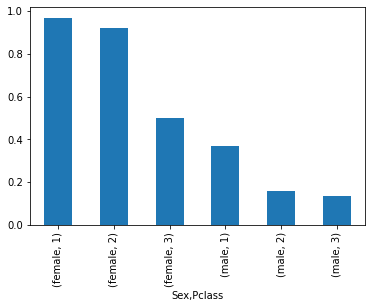

In [ ]:
sex_pclass['Survived'].plot.bar()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


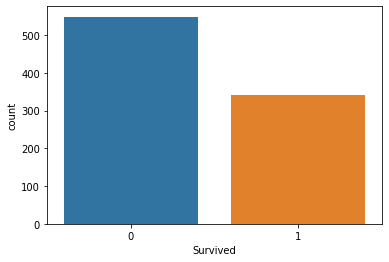

In [ ]:
# Simple Analysis of Data
sns.countplot(data['Survived'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


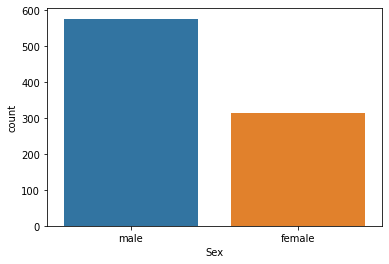

In [ ]:
sns.countplot(data['Sex'])
plt.show()

In [ ]:
sns.countplot(data['Pclass'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


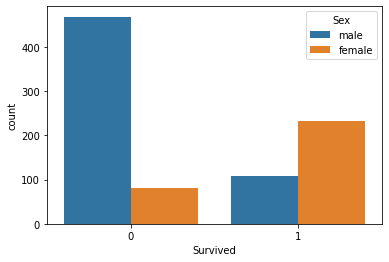

In [ ]:
sns.countplot(data['Survived'],hue=data['Sex'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


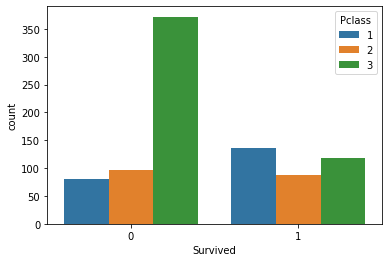

In [ ]:
sns.countplot(data['Survived'],hue=data['Pclass'])
plt.show()

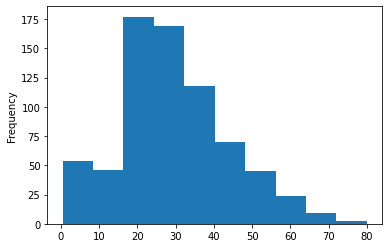

In [ ]:
data['Age'].plot.hist()
plt.show()

In [ ]:
# Deleting Unecessary Columns, Null Values (Data Wrangling- preparing data)
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [ ]:
data.drop(['PassengerId','Name','Ticket','Cabin','Embarked'],axis=1,inplace=True)

In [ ]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [ ]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [ ]:
mean_age = np.round(data['Age'].mean())
mean_age


30.0

In [ ]:
data['Age'] = data['Age'].fillna(mean_age)

In [ ]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [ ]:
data.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833


In [ ]:
# replacing the object data to numeric data
sex = pd.get_dummies(data['Sex'])
sex.head(3)

,female,male
0,0,1
1,1,0
2,1,0


In [ ]:
sex.drop(['female'],axis=1,inplace=True)

In [ ]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [ ]:
data = pd.concat([data,sex],axis=1)

In [ ]:
data.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,male
0,0,3,male,22.0,1,0,7.2500,1
1,1,1,female,38.0,1,0,71.2833,0


In [ ]:
del data['Sex']

In [ ]:
data.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0


In [ ]:
data = data.rename(columns={"male":"sex"})
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,sex
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1
